In [30]:
require 'torch'
require 'paths'

In [31]:
mnist = {}
mnist.path_remote = 'https://s3.amazonaws.com/torch7/data/mnist.t7.tgz'
mnist.path_dataset = '../data/mnist.t7'
mnist.path_trainset = paths.concat(mnist.path_dataset, 'train_32x32.t7')
mnist.path_testset = paths.concat(mnist.path_dataset, 'test_32x32.t7')

In [32]:
function mnist.download()
   if not paths.filep(mnist.path_trainset) or not paths.filep(mnist.path_testset) then
      local remote = mnist.path_remote
      local tar = paths.basename(remote)
      os.execute('wget ' .. remote .. '; ' .. 'tar xvf ' .. tar .. '; rm ' .. tar)
   end
end

In [33]:
function mnist.loadDataset(fileName, maxLoad)
    mnist.download()
    local f = torch.load(fileName, 'ascii')
    local data = f.data:type(torch.getdefaulttensortype())
    local labels = f.labels

    local nExample = f.data:size(1)
    if maxLoad and maxLoad > 0 and maxLoad < nExample then
      nExample = maxLoad
      print('<mnist> loading only ' .. nExample .. ' examples')
    end
    data = data[{{1,nExample},{},{},{}}]
    labels = labels[{{1,nExample}}]
    print('<mnist> done')

    local dataset = {}    
    data:mul(1/data:std()*0.5)
    data:add(-data:mean()+0.5)
    
    dataset.data = data
    dataset.labels = labels
    dataset.order = torch.randperm(nExample)
    dataset.std = data:std()
    dataset.mean = data:mean()

    -- normalization
    

    function dataset:shuffle()
        dataset.order = torch.randperm(nExample)        
    end
    
    function dataset:recover(img)
        img:mul(data:std())
        img:add(dataset.mean)
        return img
    end

    function dataset:size()
      return nExample
    end

    local labelvector = torch.zeros(10)
    setmetatable(dataset, {__index = 
            function(self, index)
                index = dataset.order[index]
                local input = self.data[index]
                local class = self.labels[index]
                local label = labelvector:zero()
                label[class] = 1
                local example = {input, label}
                return example
            end})
    return dataset
end

In [34]:
function mnist.loadTrainSet(maxLoad)
   return mnist.loadDataset(mnist.path_trainset, maxLoad)
end

function mnist.loadTestSet(maxLoad, geometry)
   return mnist.loadDataset(mnist.path_testset, maxLoad)
end

In [35]:
trainSet = mnist.loadTrainSet()


<mnist> done	


In [36]:
print(trainSet.data:mean())
print(trainSet.data:std())

0.5000000001501	


0.50000000007789	


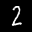

In [37]:
itorch.image(trainSet[1][1])

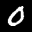

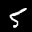

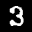

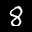

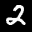

In [8]:
itorch.image(trainSet:recover(trainSet[1][1]))
itorch.image(trainSet:recover(trainSet[2][1]))
itorch.image(trainSet:recover(trainSet[3][1]))
itorch.image(trainSet:recover(trainSet[4][1]))
itorch.image(trainSet:recover(trainSet[5][1]))

In [26]:
trainSet:shuffle()

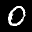

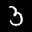

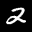

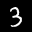

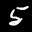

In [27]:
itorch.image(trainSet:recover(trainSet[1][1]))
itorch.image(trainSet:recover(trainSet[2][1]))
itorch.image(trainSet:recover(trainSet[3][1]))
itorch.image(trainSet:recover(trainSet[4][1]))
itorch.image(trainSet:recover(trainSet[5][1]))